##  Regression Analysis for CO2 Emission Prediction

### Import Necessary Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import pymc as pm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/CO2 Emission.csv")

#### Load and Explore the Dataset

In [ ]:
df.head()

latitude  longitude  SulphurDioxide_SO2_column_number_density  \
0    -23.73      28.77                                  0.000167   
1    -23.73      28.77                                 -0.000155   
2    -23.73      28.77                                 -0.000065   
3    -23.73      28.77                                  0.000152   
4    -23.73      28.77                                 -0.000133   

   SulphurDioxide_cloud_fraction  CarbonMonoxide_CO_column_number_density  \
0                       0.223929                                 0.023408   
1                       0.080281                                 0.024189   
2                       0.161050                                 0.023697   
3                       0.046504                                 0.022360   
4                       0.249395                                 0.024248   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                               2829.881106                  2583.717282   
1                               2136.614929                  1864.319244   
2                               1907.515503                  1904.701915   
3                               2122.067948                  1696.206336   
4                               1971.516319                  1482.813549   

   NitrogenDioxide_NO2_column_number_density  \
0                                   0.000057   
1                                   0.000069   
2                                   0.000057   
3                                   0.000060   
4                                   0.000050   

   NitrogenDioxide_tropopause_pressure  \
0                          9904.580385   
1                          8935.897092   
2                          8613.778141   
3                          8613.755493   
4                          8613.765884   

   NitrogenDioxide_absorbing_aerosol_index  Ozone_O3_column_number_density  \
0                                -1.668380                        0.121379   
1                                -1.347168                        0.118592   
2                                -1.487738                        0.118847   
3                                -1.050435                        0.116185   
4                                -1.575038                        0.117078   

   Ozone_O3_effective_temperature  Ozone_cloud_fraction  \
0                      226.969563              0.544172   
1                      228.693974              0.384905   
2                      229.691830              0.460520   
3                      227.465124              0.076428   
4                      227.696012              0.354856   

   Cloud_cloud_top_pressure  Cloud_surface_albedo    emission  
0              47991.296016              0.353778   86.051700  
1              61615.924069              0.244987   88.875670  
2              73062.540440              0.245102   91.723114  
3              57079.903301              0.210904   92.883870  
4              71780.922994              0.317756  101.597170

In [ ]:
df.describe()

latitude     longitude  SulphurDioxide_SO2_column_number_density  \
count  68711.000000  68711.000000                              68711.000000   
mean     -27.854459     27.772959                                  0.000258   
std        2.767566      2.744965                                  0.000595   
min      -33.930000     21.070000                                 -0.000989   
25%      -29.630000     26.370000                                 -0.000067   
50%      -28.130000     28.770000                                  0.000144   
75%      -25.730000     29.470000                                  0.000434   
max      -23.730000     31.170000                                  0.009526   

       SulphurDioxide_cloud_fraction  CarbonMonoxide_CO_column_number_density  \
count                   68711.000000                             68711.000000   
mean                        0.106517                                 0.025354   
std                         0.068584                                 0.005975   
min                         0.000000                                 0.011216   
25%                         0.054479                                 0.021545   
50%                         0.100598                                 0.023689   
75%                         0.153072                                 0.027430   
max                         0.299987                                 0.067274   

       CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
count                              68711.000000                 68711.000000   
mean                                1179.622554                   956.927183   
std                                  662.928746                   986.943206   
min                                  122.330488                  -404.968048   
25%                                  665.207745                   129.551999   
50%                                 1055.020286                   588.231808   
75%                                 1576.394909                  1582.268776   
max                                 9921.275391                  4988.166992   

       NitrogenDioxide_NO2_column_number_density  \
count                               68711.000000   
mean                                    0.000079   
std                                     0.000048   
min                                     0.000004   
25%                                     0.000059   
50%                                     0.000067   
75%                                     0.000080   
max                                     0.001101   

       NitrogenDioxide_tropopause_pressure  \
count                         68711.000000   
mean                           9975.369012   
std                            2272.175275   
min                            7311.868269   
25%                            8614.060684   
50%                            9403.708759   
75%                           10389.863481   
max                           27090.123093   

       NitrogenDioxide_absorbing_aerosol_index  \
count                             68711.000000   
mean                                 -0.931529   
std                                   0.824226   
min                                  -3.991797   
25%                                  -1.515424   
50%                                  -1.090888   
75%                                  -0.327944   
max                                   2.170511   

       Ozone_O3_column_number_density  Ozone_O3_effective_temperature  \
count                    68711.000000                    68711.000000   
mean                         0.121950                      229.410549   
std                          0.006650                        2.243655   
min                          0.103986                      217.395516   
25%                          0.117487                      228.081014   
50%                          0.120911                      229.567644   
75

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68711 entries, 0 to 68710
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   latitude                                   68711 non-null  float64
 1   longitude                                  68711 non-null  float64
 2   SulphurDioxide_SO2_column_number_density   68711 non-null  float64
 3   SulphurDioxide_cloud_fraction              68711 non-null  float64
 4   CarbonMonoxide_CO_column_number_density    68711 non-null  float64
 5   CarbonMonoxide_H2O_column_number_density   68711 non-null  float64
 6   CarbonMonoxide_cloud_height                68711 non-null  float64
 7   NitrogenDioxide_NO2_column_number_density  68711 non-null  float64
 8   NitrogenDioxide_tropopause_pressure        68711 non-null  float64
 9   NitrogenDioxide_absorbing_aerosol_index    68711 non-null  float64
 10  Ozone_O3_column_number

### Analyze Skewness of Numerical Columns


Skewness of numerical columns:
 latitude                                     -0.151532
longitude                                    -1.132150
SulphurDioxide_SO2_column_number_density      2.863771
SulphurDioxide_cloud_fraction                 0.388568
CarbonMonoxide_CO_column_number_density       1.625039
CarbonMonoxide_H2O_column_number_density      1.242722
CarbonMonoxide_cloud_height                   1.081499
NitrogenDioxide_NO2_column_number_density     5.052912
NitrogenDioxide_tropopause_pressure           2.226889
NitrogenDioxide_absorbing_aerosol_index       0.382643
Ozone_O3_column_number_density                0.531144
Ozone_O3_effective_temperature               -0.478736
Ozone_cloud_fraction                          0.872827
Cloud_cloud_top_pressure                     -0.338798
Cloud_surface_albedo                         -0.091107
emission                                     17.648195
dtype: float64


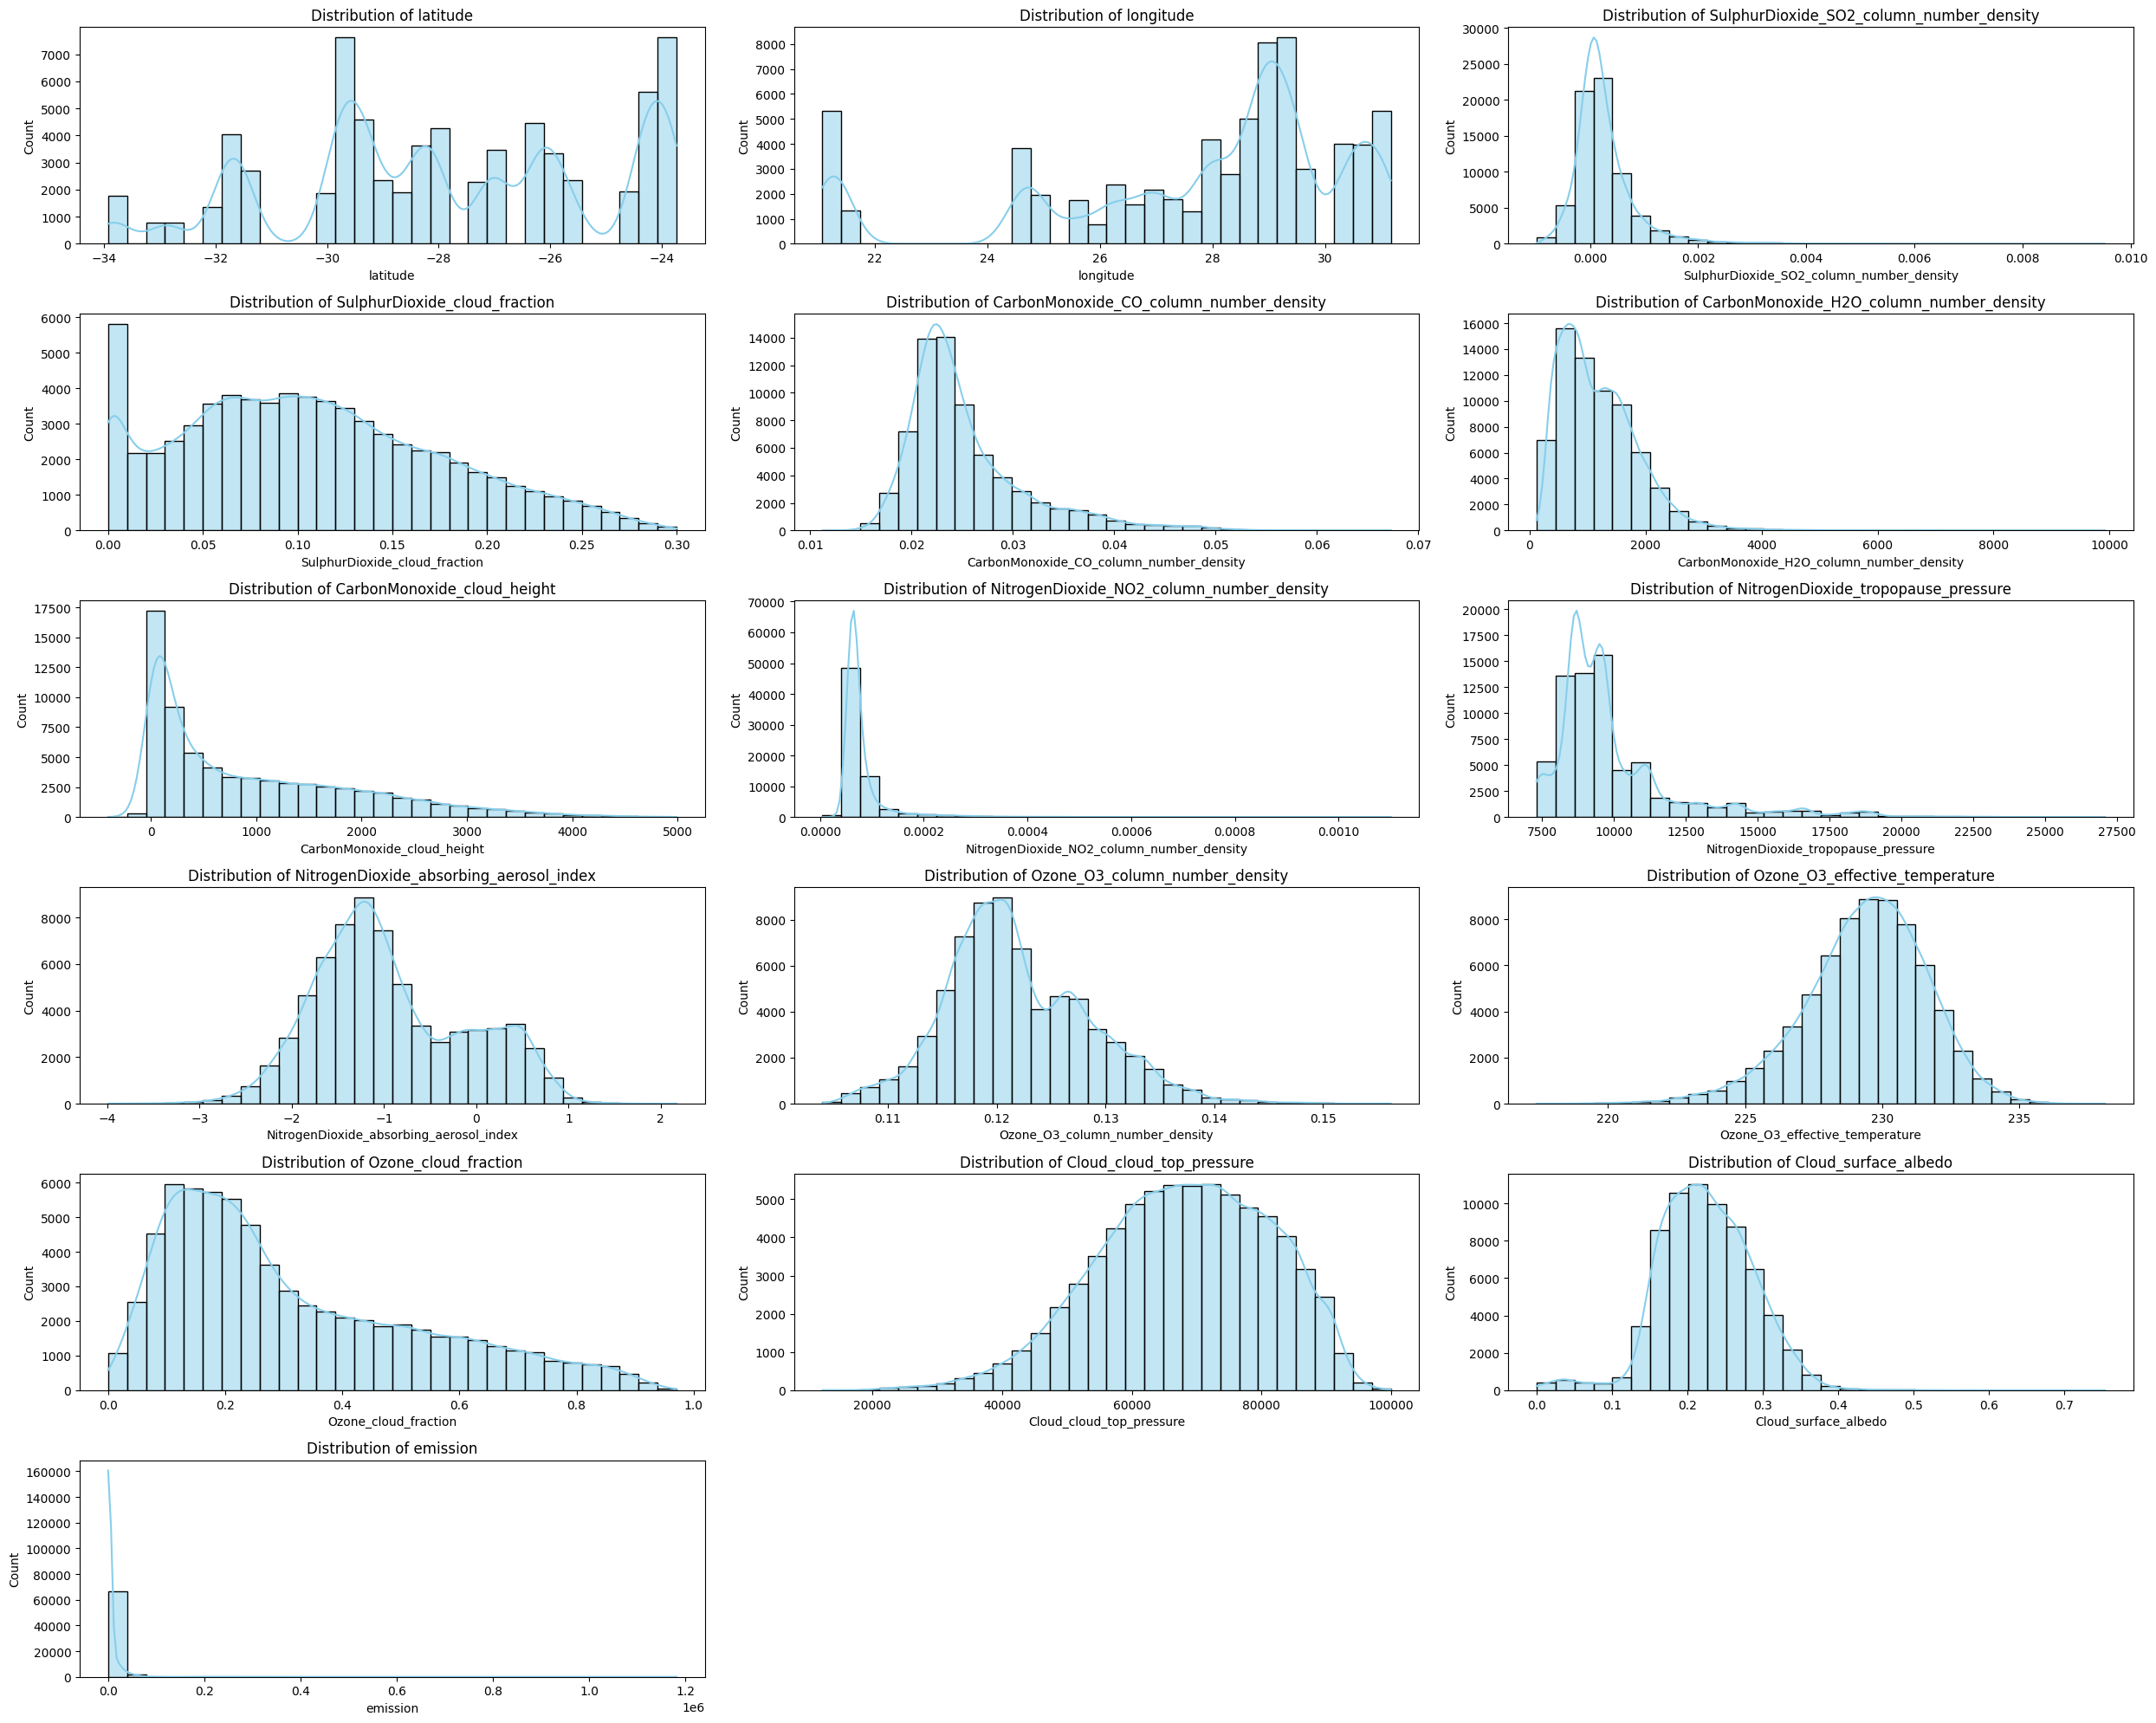

In [4]:
skewness = df.skew()
print("Skewness of numerical columns:\n", skewness)

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(25, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

#### Apply Power Transformation to Reduce Skewness


In [5]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

transformer = PowerTransformer(method='yeo-johnson')
df[numerical_columns] = transformer.fit_transform(df[numerical_columns])
print("Skewness after transformation:\n", df.skew())

Skewness after transformation:
 latitude                                    -0.000852
longitude                                   -0.226752
SulphurDioxide_SO2_column_number_density    -0.060610
SulphurDioxide_cloud_fraction                0.033573
CarbonMonoxide_CO_column_number_density      0.098935
CarbonMonoxide_H2O_column_number_density    -0.019842
CarbonMonoxide_cloud_height                 -0.154194
NitrogenDioxide_NO2_column_number_density    0.347313
NitrogenDioxide_tropopause_pressure          0.049921
NitrogenDioxide_absorbing_aerosol_index      0.114560
Ozone_O3_column_number_density              -0.000236
Ozone_O3_effective_temperature               0.009166
Ozone_cloud_fraction                         0.125648
Cloud_cloud_top_pressure                    -0.064301
Cloud_surface_albedo                         0.028905
emission                                    -0.001857
dtype: float64


### Visualize Box Plots Before and After Capping


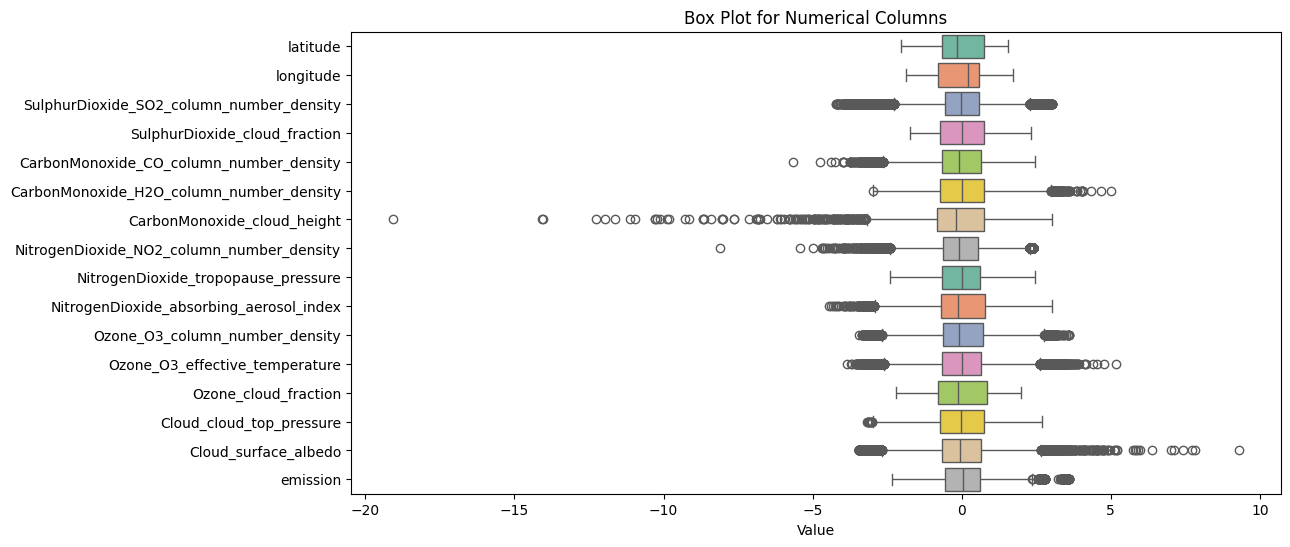

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], orient='h', palette='Set2')
plt.title("Box Plot for Numerical Columns")
plt.xlabel("Value")
plt.show()

In [6]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for col in numerical_columns:
    df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

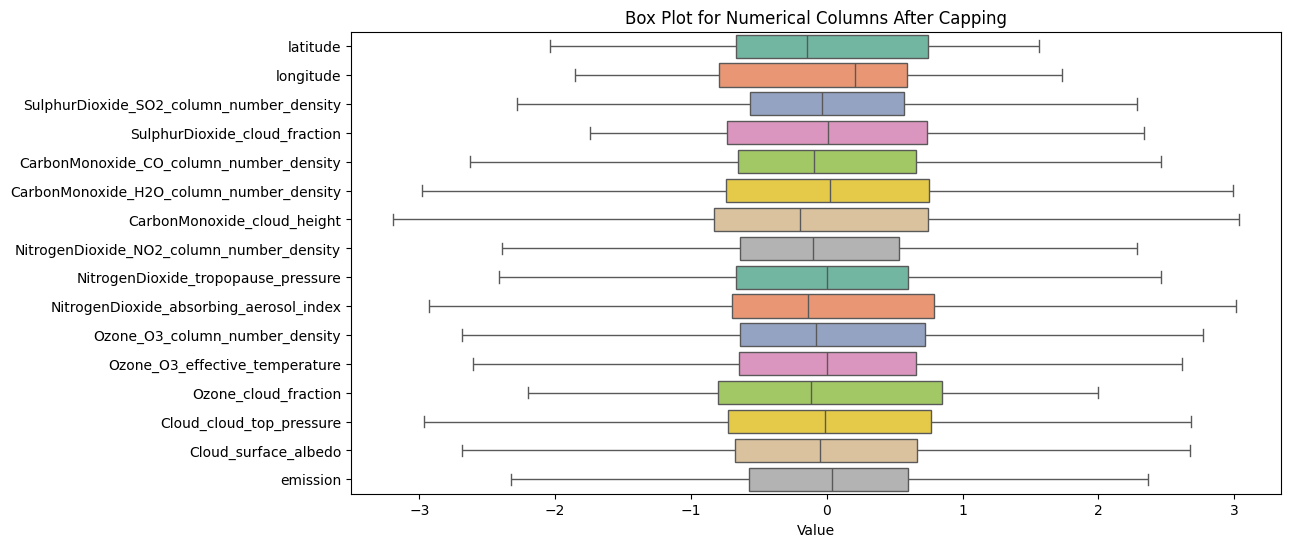

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], orient='h', palette='Set2')
plt.title("Box Plot for Numerical Columns After Capping")
plt.xlabel("Value")
plt.show()

### Correlation Heatmap for Numerical Columns


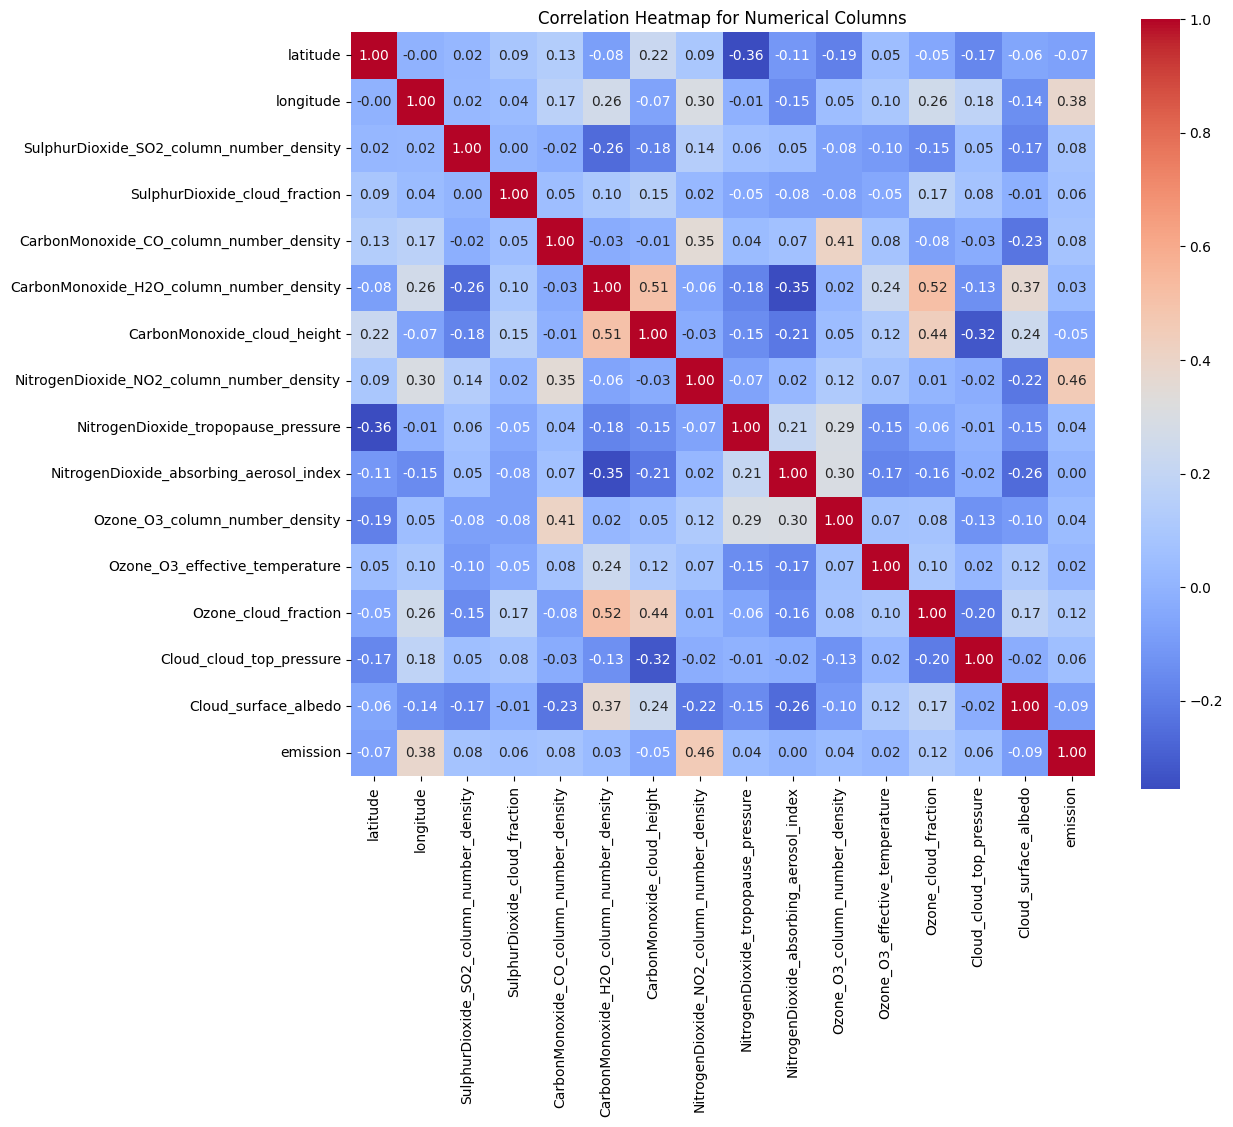

In [ ]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

### Analyze Target Variable


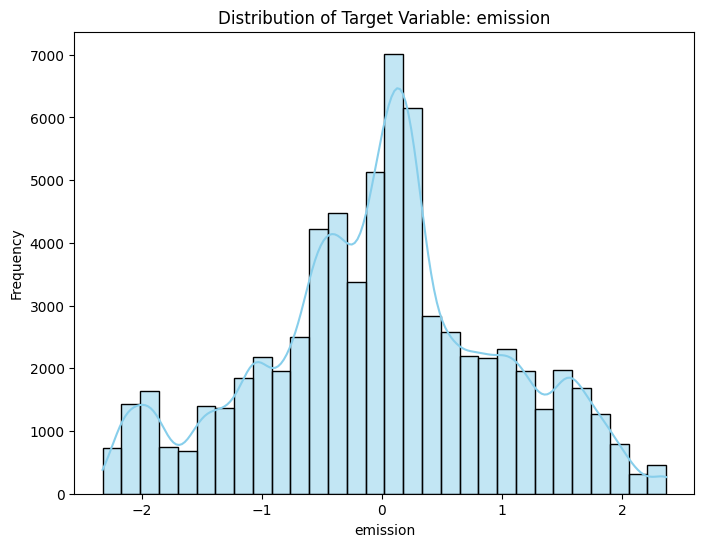

In [ ]:
target = "emission"

plt.figure(figsize=(8, 6))
sns.histplot(df[target], kde=True, bins=30, color="skyblue")
plt.title(f"Distribution of Target Variable: {target}")
plt.xlabel(target)
plt.ylabel("Frequency")
plt.show()

### Evaluate Feature Importance

In [ ]:
target_corr = correlation_matrix[target].sort_values(ascending=False)
print("\nFeature Importance (Correlation with Target):")
print(target_corr)


Feature Importance (Correlation with Target):
emission                                     1.000000
NitrogenDioxide_NO2_column_number_density    0.458860
longitude                                    0.382382
Ozone_cloud_fraction                         0.115627
CarbonMonoxide_CO_column_number_density      0.078057
SulphurDioxide_SO2_column_number_density     0.077072
SulphurDioxide_cloud_fraction                0.062955
Cloud_cloud_top_pressure                     0.055267
NitrogenDioxide_tropopause_pressure          0.040084
Ozone_O3_column_number_density               0.037955
CarbonMonoxide_H2O_column_number_density     0.031658
Ozone_O3_effective_temperature               0.017963
NitrogenDioxide_absorbing_aerosol_index      0.004899
CarbonMonoxide_cloud_height                 -0.048479
latitude                                    -0.074380
Cloud_surface_albedo                        -0.087365
Name: emission, dtype: float64


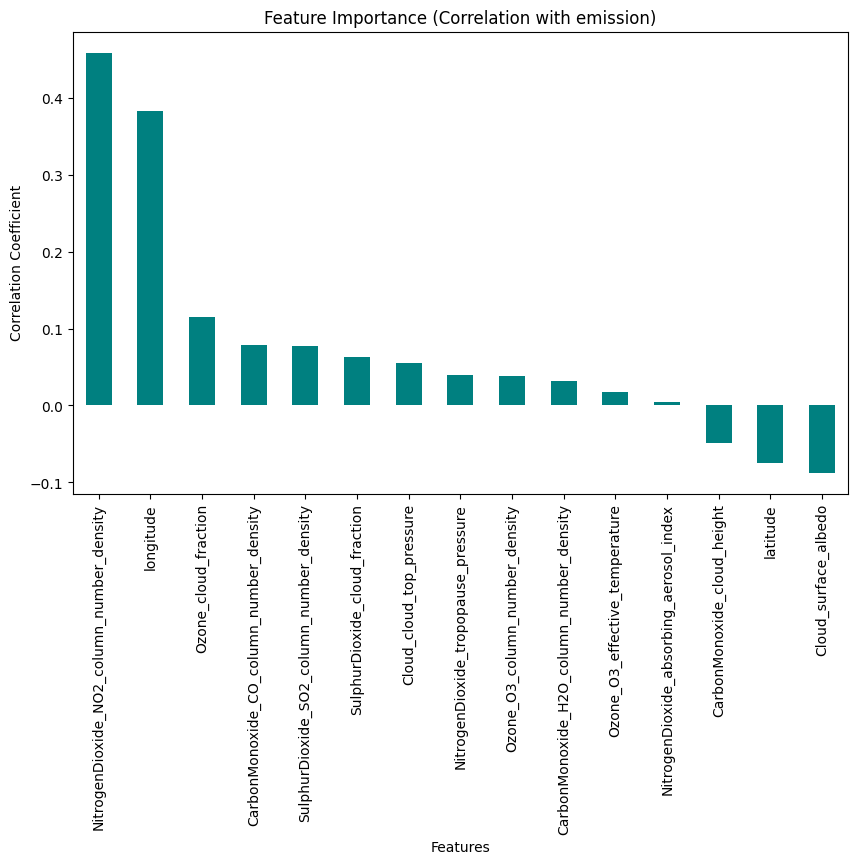

In [ ]:
plt.figure(figsize=(10, 6))
target_corr.drop(target).plot(kind="bar", color="teal")
plt.title(f"Feature Importance (Correlation with {target})")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

### Standardize Features


In [7]:
from sklearn.preprocessing import StandardScaler
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

In [8]:
def plot_data(df, numerical_columns):
    for col in numerical_columns[:15]:
        plt.figure(figsize=(10, 4))
        # Histogram of scaled data
        plt.hist(df[col], bins=30, alpha=0.7, label="Scaled")
        plt.title(f"Scaled Distribution: {col}")
        plt.legend()
        plt.show()

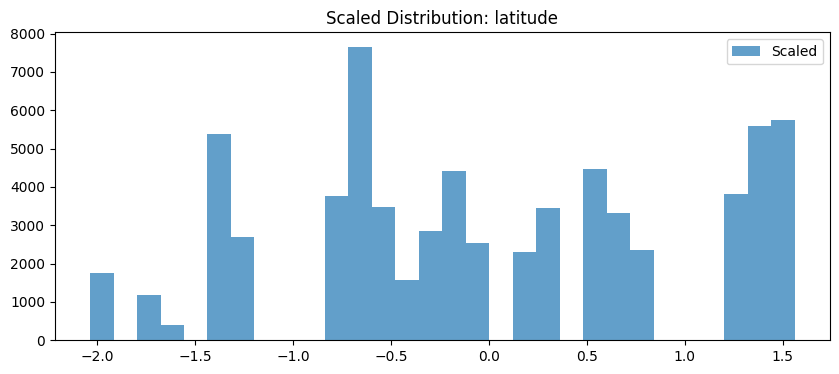

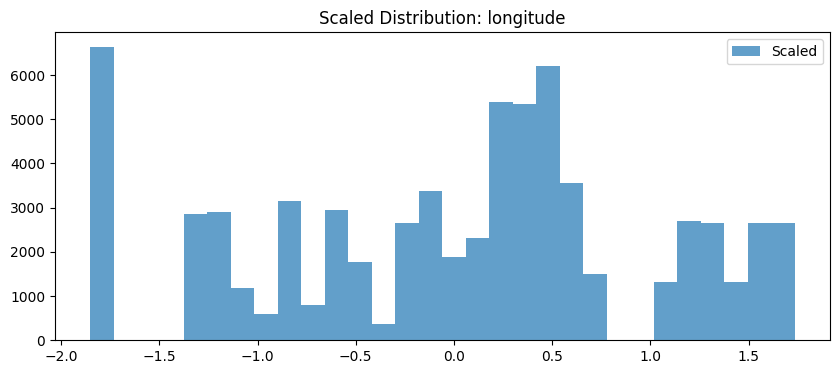

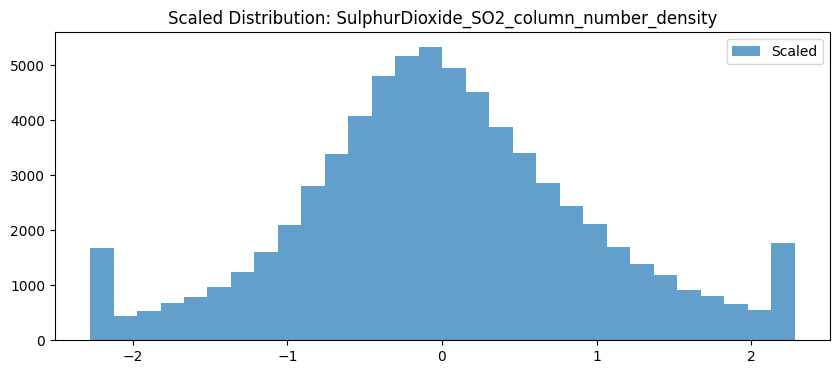

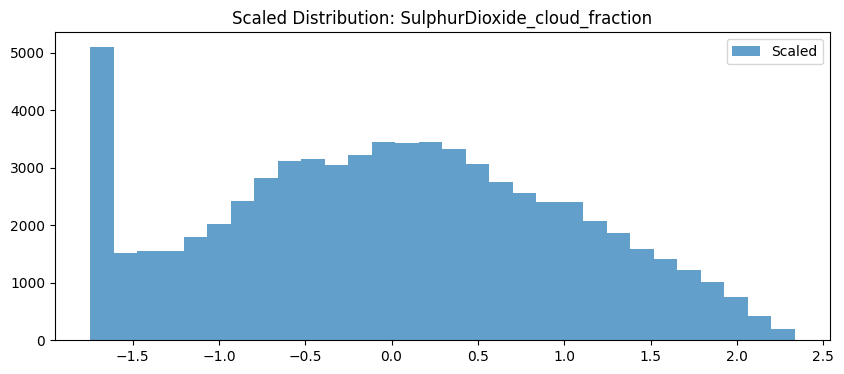

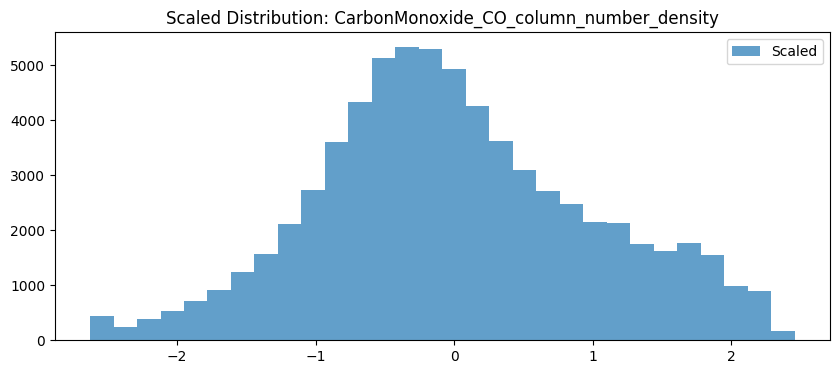

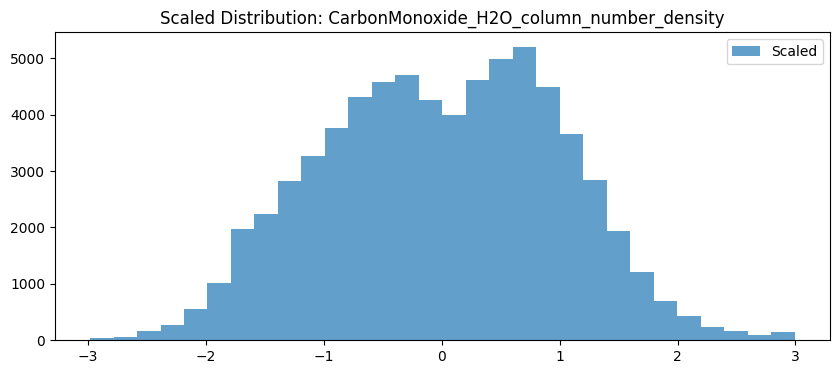

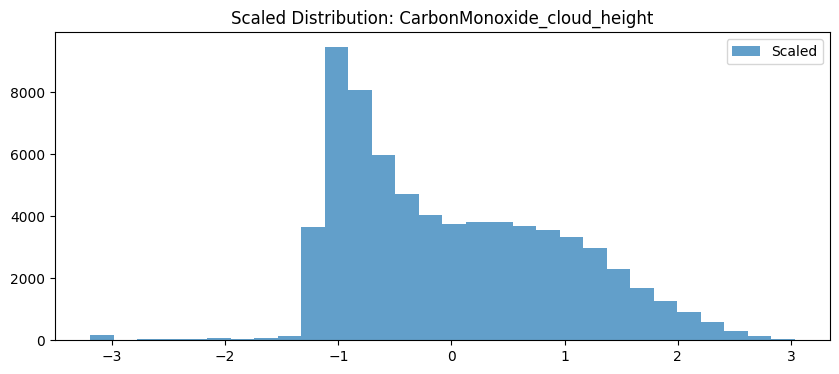

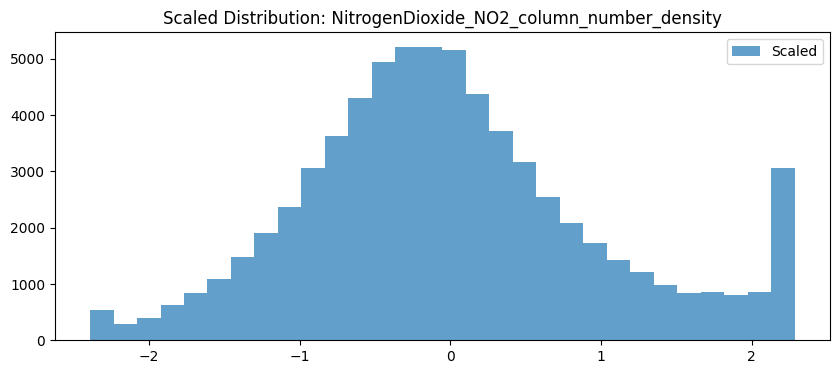

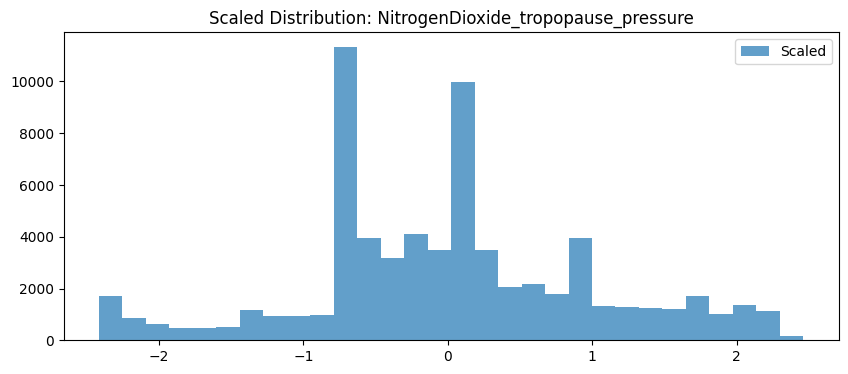

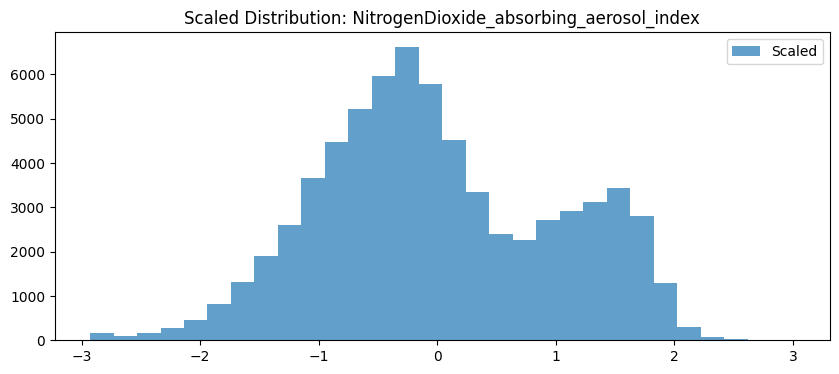

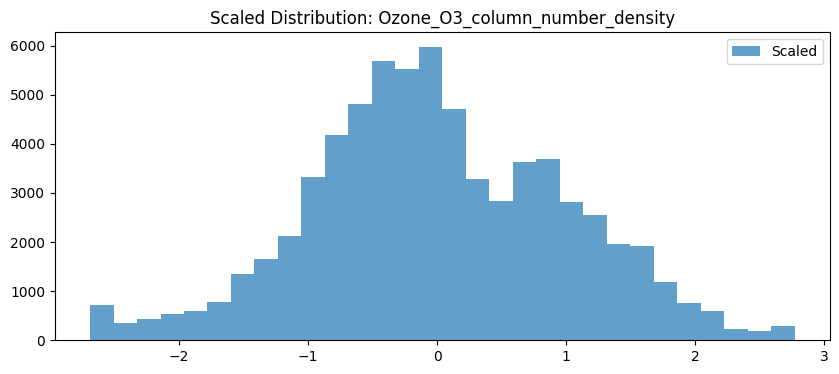

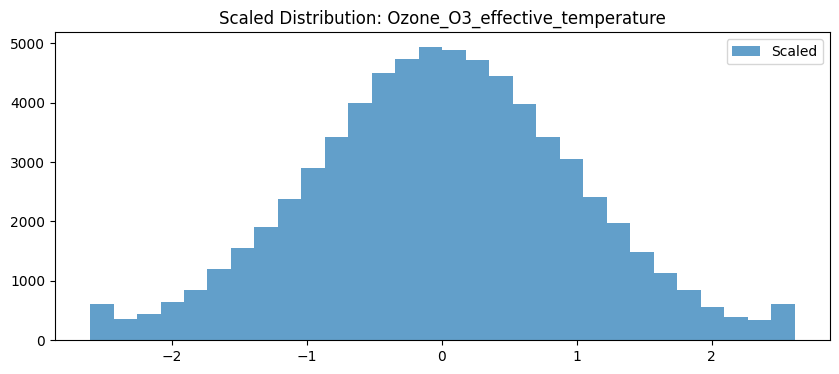

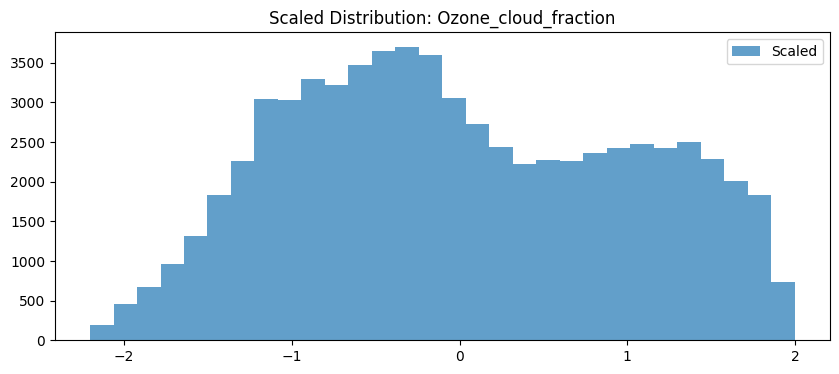

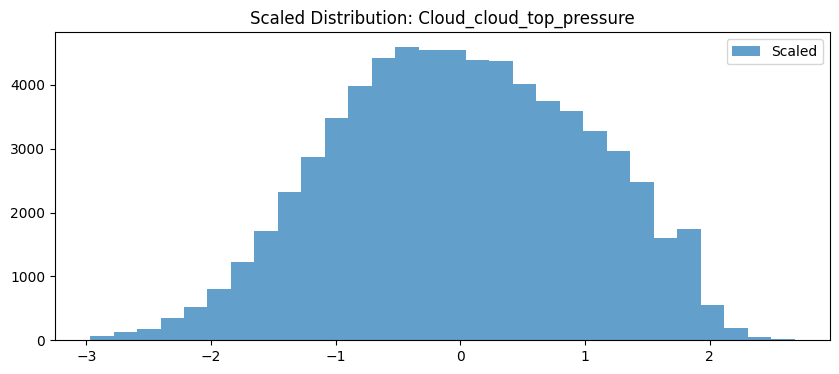

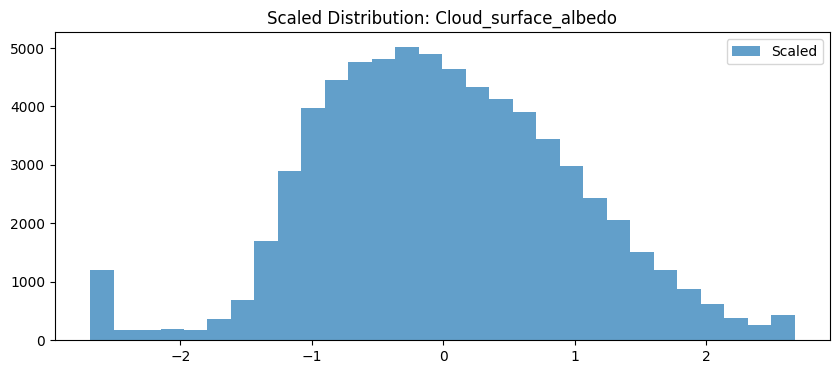

In [9]:
plot_data(df, numerical_columns)

### Split Dataset into Training and Testing Sets

In [10]:
from sklearn.model_selection import train_test_split

# Define predictors and target variable
predictors = [
    'latitude', 'longitude', 'SulphurDioxide_SO2_column_number_density',
    'SulphurDioxide_cloud_fraction', 'CarbonMonoxide_CO_column_number_density',
    'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height',
    'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropopause_pressure',
    'NitrogenDioxide_absorbing_aerosol_index', 'Ozone_O3_column_number_density',
    'Ozone_O3_effective_temperature', 'Ozone_cloud_fraction', 'Cloud_cloud_top_pressure',
    'Cloud_surface_albedo'
]
target = 'emission'

X = df[predictors]
y = df[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the datasets
print(f"Training set shape (X_train): {X_train.shape}, (y_train): {y_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}, (y_test): {y_test.shape}")

Training set shape (X_train): (54968, 15), (y_train): (54968,)
Testing set shape (X_test): (13743, 15), (y_test): (13743,)


### Bayesian Linear Regression

**Normal Distribuation**

In [ ]:
import pymc as pm
with pm.Model() as model:
    # Priors for coefficients
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    betas = pm.Normal('betas', mu=0, sigma=10, shape=X_train.shape[1])
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Linear model
    mu = alpha + pm.math.dot(X_train, betas)

    # Likelihood
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y_train)

    # Posterior sampling using MCMC (NUTS sampler)
    trace = pm.sample(1000, return_inferencedata=False)

Output()

Output()

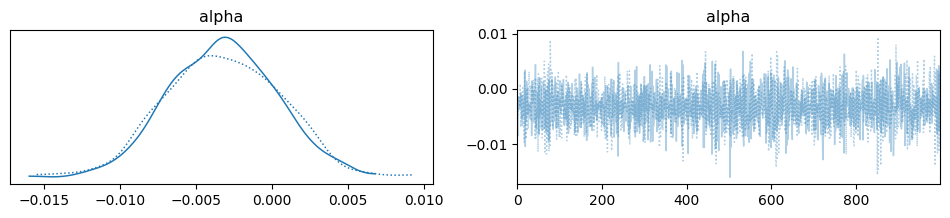

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import pymc as pm
with model:
    # Convert PyMC3 trace to ArviZ InferenceData
    trace_infdata = pm.to_inference_data(trace)

# Plot trace for the specified variables
az.plot_trace(trace_infdata, var_names=['alpha'])

# Display the plot
plt.show()

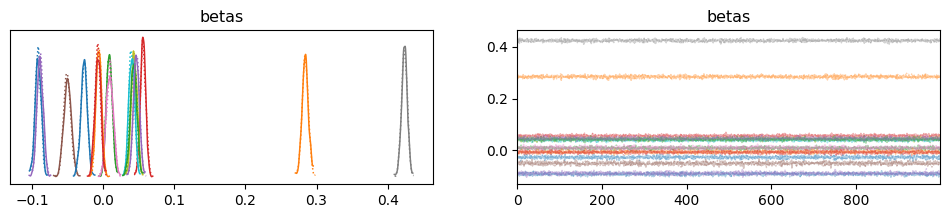

In [ ]:
with model:
    # Convert PyMC3 trace to ArviZ InferenceData
    trace_infdata = pm.to_inference_data(trace)

# Plot trace for the specified variables
az.plot_trace(trace_infdata, var_names=['betas'])

# Display the plot
plt.show()

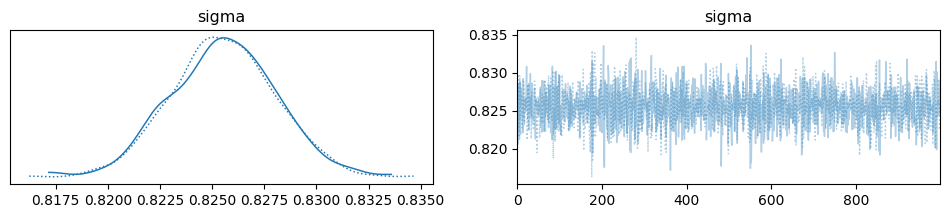

In [ ]:
with model:
    # Convert PyMC3 trace to ArviZ InferenceData
    trace_infdata = pm.to_inference_data(trace)

# Plot trace for the specified variables
az.plot_trace(trace_infdata, var_names=[ 'sigma'])

# Display the plot
plt.show()

In [ ]:
import arviz as az
import pymc as pm

with model:
    trace_infdata = pm.to_inference_data(trace)

summary = az.summary(trace_infdata)
summary




mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha     -0.003  0.004  -0.009    0.003        0.0      0.0    4871.0   
betas[0]  -0.091  0.004  -0.100   -0.084        0.0      0.0    2521.0   
betas[1]   0.284  0.004   0.276    0.292        0.0      0.0    2545.0   
betas[2]   0.009  0.004   0.001    0.017        0.0      0.0    3598.0   
betas[3]   0.056  0.004   0.049    0.063        0.0      0.0    3573.0   
betas[4]  -0.089  0.004  -0.097   -0.081        0.0      0.0    2557.0   
betas[5]  -0.050  0.005  -0.060   -0.041        0.0      0.0    2430.0   
betas[6]   0.010  0.005   0.000    0.018        0.0      0.0    2712.0   
betas[7]   0.424  0.004   0.415    0.431        0.0      0.0    3467.0   
betas[8]   0.044  0.004   0.037    0.051        0.0      0.0    3031.0   
betas[9]   0.040  0.004   0.033    0.048        0.0      0.0    3392.0   
betas[10] -0.027  0.005  -0.036   -0.019        0.0      0.0    2906.0   
betas[11] -0.006  0.004  -0.013    0.001        0.0      0.0    4013.0   
betas[12]  0.043  0.004   0.035    0.051        0.0      0.0    3034.0   
betas[13] -0.007  0.004  -0.015    0.000        0.0      0.0    3695.0   
betas[14]  0.047  0.004   0.039    0.055        0.0      0.0    2825.0   
sigma      0.826  0.003   0.821    0.830        0.0      0.0    3796.0   

           ess_tail  r_hat  
alpha        1319.0   1.01  
betas[0]     1716.0   1.00  
betas[1]     1680.0   1.00  
betas[2]     1431.0   1.00  
betas[3]     1447.0   1.00  
betas[4]     1637.0   1.00  
betas[5]     1855.0   1.00  
betas[6]     1449.0   1.00  
betas[7]     1780.0   1.00  
betas[8]     1413.0   1.00  
betas[9]     1716.0   1.00  
betas[10]    1558.0   1.00  
betas[11]    1620.0   1.00  
betas[12]    1418.0   1.00  
betas[13]    1604.0   1.00  
betas[14]    1755.0   1.00  
sigma        1524.0   1.00

In [ ]:
posterior_betas_samples = trace['betas']
posterior_alpha_samples = trace['alpha']

predictions_samples = []
for i in range(posterior_betas_samples.shape[0]):  # Loop over posterior samples
    # Get the alpha and betas for this sample
    alpha_sample = posterior_alpha_samples[i]
    betas_sample = posterior_betas_samples[i]

    # Calculate the predictions for the test set for this sample
    predictions_sample = alpha_sample + np.dot(X_test, betas_sample)

    # Append the predictions to the list
    predictions_samples.append(predictions_sample)

predictions_samples = np.array(predictions_samples)

In [ ]:
lower_bound = np.percentile(predictions_samples, 2.5, axis=0)  # Lower bound of prediction intervals
upper_bound = np.percentile(predictions_samples, 97.5, axis=0)

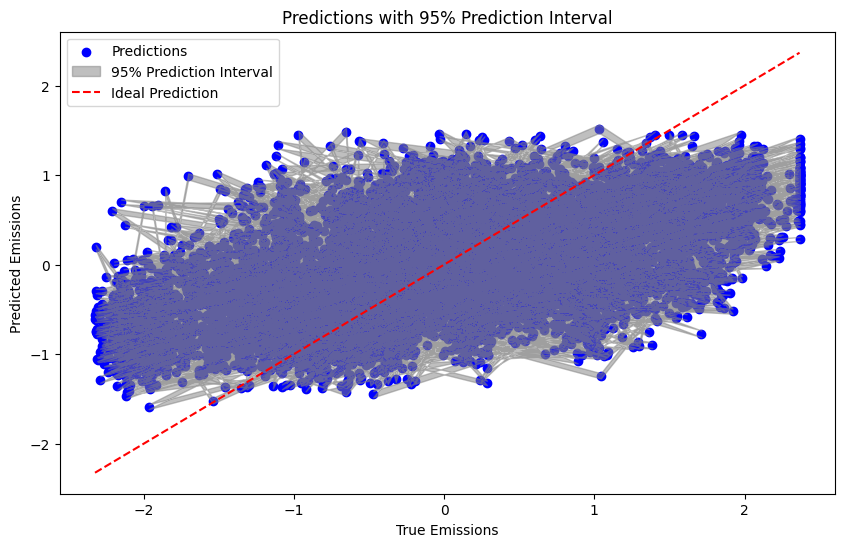

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, np.mean(predictions_samples, axis=0), color='blue', label='Predictions')
plt.fill_between(y_test, lower_bound, upper_bound, color='gray', alpha=0.5, label='95% Prediction Interval')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('True Emissions')
plt.ylabel('Predicted Emissions')
plt.legend()
plt.title('Predictions with 95% Prediction Interval')
plt.show()

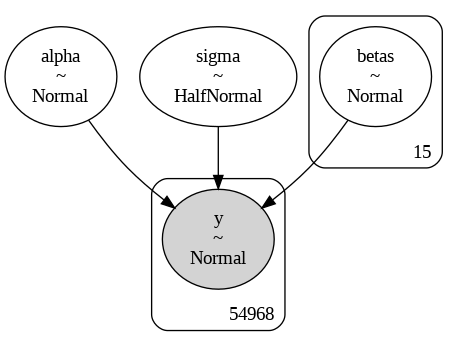

In [ ]:
from pymc import model_to_graphviz
from IPython.display import Image

# Visualize the model's DAG
with model:
    graph = model_to_graphviz(model)

# Render the graph as a PNG and display it inline
graph.render("bayesian_model", format="png", cleanup=False)
Image("bayesian_model.png")


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for each posterior sample
mse_samples = []

for i in range(posterior_betas_samples.shape[0]):
    # Get the alpha and betas for this sample
    alpha_sample = posterior_alpha_samples[i]
    betas_sample = posterior_betas_samples[i]

    # Calculate the predictions for the test set for this sample
    predictions_sample = alpha_sample + np.dot(X_test, betas_sample)

    # Calculate MSE for this sample
    mse = mean_squared_error(y_test, predictions_sample)

    # Append MSE for this sample
    mse_samples.append(mse)

# Convert mse_samples to a numpy array
mse_samples = np.array(mse_samples)

# Calculate the average MSE
average_mse = mse_samples.mean()

print(f"Average MSE: {average_mse}")


Average MSE: 0.6637925019677915


<Figure size 600x400 with 0 Axes>

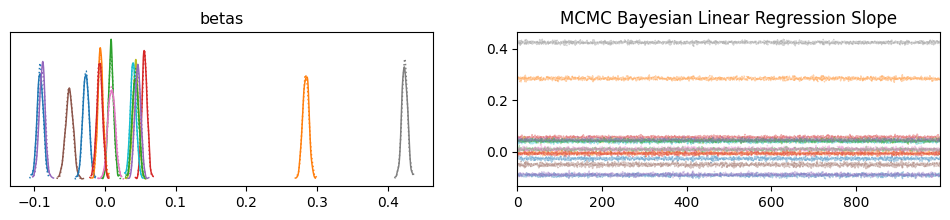

<Figure size 600x400 with 0 Axes>

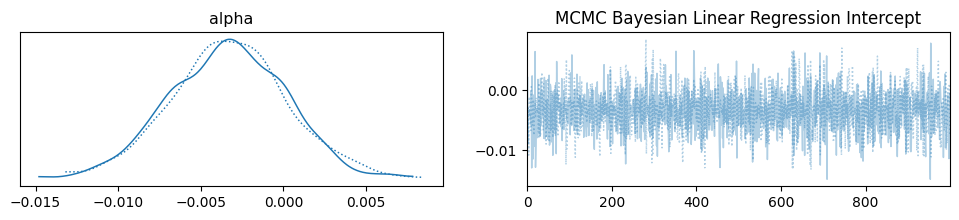

<Figure size 600x400 with 0 Axes>

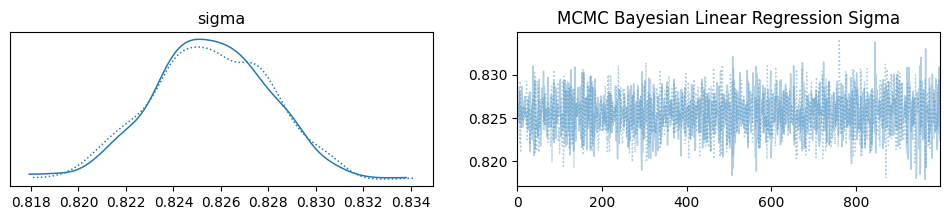

In [ ]:
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

with model:
    # Convert the PyMC3 trace to ArviZ InferenceData
    trace_infdata = pm.to_inference_data(trace)

# Plot for 'betas' (coefficients/slope)
plt.figure(figsize=(6, 4))
az.plot_trace(trace_infdata, var_names=["betas"])
plt.title("MCMC Bayesian Linear Regression Slope")
plt.show()

# Plot for 'alpha' (intercept)
plt.figure(figsize=(6, 4))
az.plot_trace(trace_infdata, var_names=["alpha"])
plt.title("MCMC Bayesian Linear Regression Intercept")
plt.show()

# Plot for 'sigma' (noise/uncertainty)
plt.figure(figsize=(6, 4))
az.plot_trace(trace_infdata, var_names=["sigma"])
plt.title("MCMC Bayesian Linear Regression Sigma")
plt.show()


**Beta**


In [ ]:
with pm.Model() as model:
    # Priors for coefficients (use Beta prior for betas, constrained between 0 and 1)
    alpha = pm.Normal('alpha', mu=0, sigma=10)  
    betas = pm.Beta('betas', alpha=1, beta=1, shape=X_train.shape[1])  # Beta prior for betas (shape of X_train)
    sigma = pm.HalfNormal('sigma', sigma=1)  # sigma as HalfNormal

    # Linear model
    mu = alpha + pm.math.dot(X_train, betas)

    # Likelihood (normal likelihood for regression)
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y_train)

    # Posterior sampling using MCMC (NUTS sampler)
    trace = pm.sample(1000, return_inferencedata=False)

Output()

Output()

<Figure size 600x400 with 0 Axes>

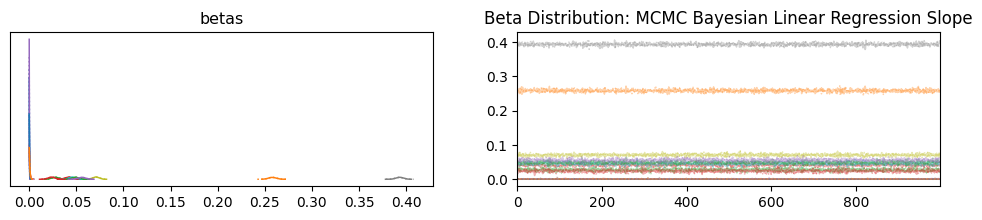

<Figure size 600x400 with 0 Axes>

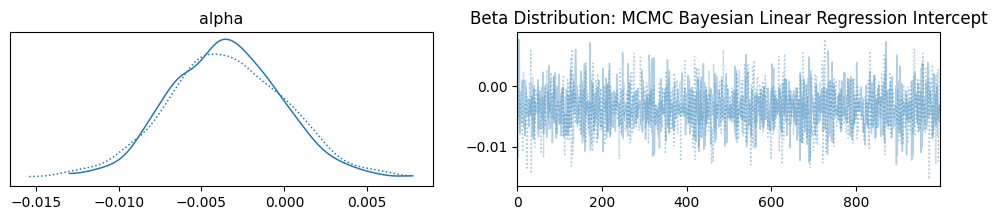

<Figure size 600x400 with 0 Axes>

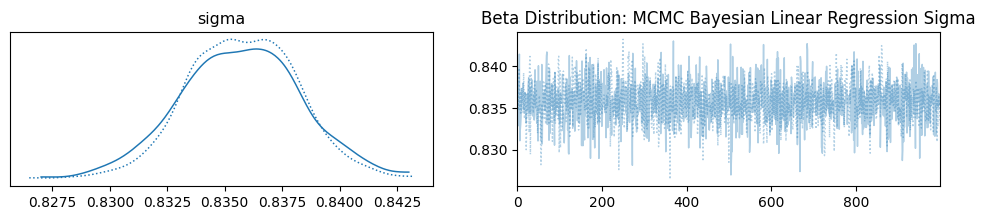

In [ ]:
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

with model:
    # Convert the PyMC3 trace to ArviZ InferenceData
    trace_infdata = pm.to_inference_data(trace)

# Plot for 'betas' (coefficients/slope)
plt.figure(figsize=(6, 4))
az.plot_trace(trace_infdata, var_names=["betas"])
plt.title("Beta Distribution: MCMC Bayesian Linear Regression Slope")
plt.show()

# Plot for 'alpha' (intercept)
plt.figure(figsize=(6, 4))
az.plot_trace(trace_infdata, var_names=["alpha"])
plt.title("Beta Distribution: MCMC Bayesian Linear Regression Intercept")
plt.show()

# Plot for 'sigma' (noise/uncertainty)
plt.figure(figsize=(6, 4))
az.plot_trace(trace_infdata, var_names=["sigma"])
plt.title("Beta Distribution: MCMC Bayesian Linear Regression Sigma")
plt.show()


In [ ]:
import arviz as az
import pymc as pm

with model:
    # Convert PyMC3 trace to ArviZ InferenceData
    trace_infdata = pm.to_inference_data(trace)

# Generate and display summary statistics
summary = az.summary(trace_infdata)
summary

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha     -0.003  0.004  -0.010    0.003        0.0      0.0    2592.0   
betas[0]   0.000  0.000   0.000    0.001        0.0      0.0    1495.0   
betas[1]   0.258  0.004   0.250    0.265        0.0      0.0    2016.0   
betas[2]   0.028  0.004   0.020    0.034        0.0      0.0    2275.0   
betas[3]   0.042  0.004   0.035    0.048        0.0      0.0    2457.0   
betas[4]   0.000  0.000   0.000    0.000        0.0      0.0    1856.0   
betas[5]   0.001  0.001   0.000    0.002        0.0      0.0    1632.0   
betas[6]   0.001  0.001   0.000    0.001        0.0      0.0    2170.0   
betas[7]   0.393  0.004   0.385    0.400        0.0      0.0    2237.0   
betas[8]   0.071  0.004   0.064    0.077        0.0      0.0    2748.0   
betas[9]   0.046  0.004   0.039    0.053        0.0      0.0    2736.0   
betas[10]  0.000  0.000   0.000    0.001        0.0      0.0    2163.0   
betas[11]  0.001  0.001   0.000    0.002        0.0      0.0    2080.0   
betas[12]  0.049  0.004   0.041    0.056        0.0      0.0    2115.0   
betas[13]  0.024  0.004   0.017    0.031        0.0      0.0    2913.0   
betas[14]  0.056  0.004   0.048    0.063        0.0      0.0    1970.0   
sigma      0.836  0.003   0.831    0.840        0.0      0.0    2560.0   

           ess_tail  r_hat  
alpha        1447.0    1.0  
betas[0]      878.0    1.0  
betas[1]     1503.0    1.0  
betas[2]     1492.0    1.0  
betas[3]     1420.0    1.0  
betas[4]      933.0    1.0  
betas[5]      911.0    1.0  
betas[6]      932.0    1.0  
betas[7]     1363.0    1.0  
betas[8]     1287.0    1.0  
betas[9]     1540.0    1.0  
betas[10]     982.0    1.0  
betas[11]    1025.0    1.0  
betas[12]    1440.0    1.0  
betas[13]    1551.0    1.0  
betas[14]    1731.0    1.0  
sigma        1526.0    1.0

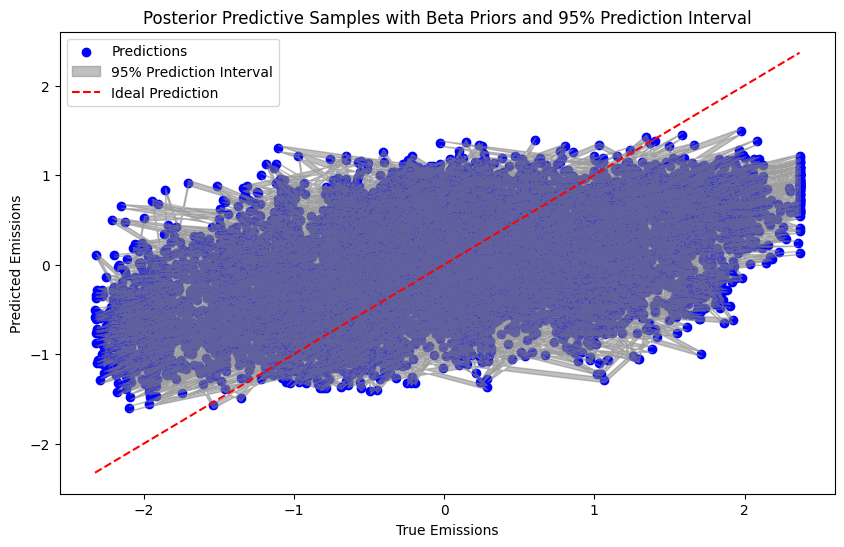

In [ ]:
# Extract posterior samples
posterior_betas_samples = trace['betas']  # Shape (num_samples, num_predictors)
posterior_alpha_samples = trace['alpha']  # Shape (num_samples,)

# Make predictions using posterior samples
predictions_samples = []
for i in range(posterior_betas_samples.shape[0]):  # Loop over posterior samples
    alpha_sample = posterior_alpha_samples[i]
    betas_sample = posterior_betas_samples[i]

    # Calculate predictions for the test set for this sample
    predictions_sample = alpha_sample + np.dot(X_test, betas_sample)

    # Append the predictions to the list
    predictions_samples.append(predictions_sample)

# Convert predictions list into a numpy array
predictions_samples = np.array(predictions_samples)

# Calculate the 2.5% and 97.5% quantiles for the prediction intervals
lower_bound = np.percentile(predictions_samples, 2.5, axis=0)  # Lower bound of prediction intervals
upper_bound = np.percentile(predictions_samples, 97.5, axis=0)  # Upper bound of prediction intervals

# Plotting the predictions with 95% prediction interval
plt.figure(figsize=(10, 6))
plt.scatter(y_test, np.mean(predictions_samples, axis=0), color='blue', label='Predictions')
plt.fill_between(y_test, lower_bound, upper_bound, color='gray', alpha=0.5, label='95% Prediction Interval')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('True Emissions')
plt.ylabel('Predicted Emissions')
plt.legend()
plt.title('Posterior Predictive Samples with Beta Priors and 95% Prediction Interval')  # Mention Beta prior
plt.show()




In [ ]:
# Calculate the MSE for each posterior sample
mse_samples = []
for i in range(posterior_betas_samples.shape[0]):
    alpha_sample = posterior_alpha_samples[i]
    betas_sample = posterior_betas_samples[i]

    # Calculate predictions for the test set for this sample
    predictions_sample = alpha_sample + np.dot(X_test, betas_sample)

    # Calculate MSE for this sample
    mse = mean_squared_error(y_test, predictions_sample)

    # Append MSE for this sample
    mse_samples.append(mse)

# Convert mse_samples to a numpy array
mse_samples = np.array(mse_samples)

# Calculate the average MSE
average_mse = mse_samples.mean()

print(f"Average MSE (prior beta): {average_mse}")

Average MSE (prior beta): 0.6828903500628665


**Laplace**

In [ ]:
with pm.Model() as model:
    # Priors for coefficients (use Laplace prior for betas)
    alpha = pm.Normal('alpha', mu=0, sigma=10)  # alpha as Normal (no constraints)
    betas = pm.Laplace('betas', mu=0, b=1, shape=X_train.shape[1])  # Laplace (L1) prior for betas
    sigma = pm.HalfNormal('sigma', sigma=1)  # sigma as HalfNormal

    # Linear model
    mu = alpha + pm.math.dot(X_train, betas)

    # Likelihood (normal likelihood for regression)
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y_train)

    # Posterior sampling using MCMC (NUTS sampler)
    trace = pm.sample(1000, return_inferencedata=False)




Output()

Output()

<Figure size 600x400 with 0 Axes>

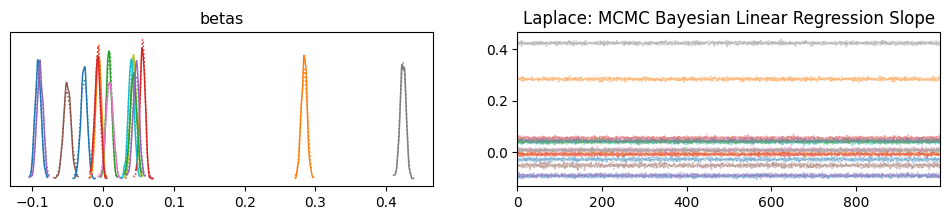

<Figure size 600x400 with 0 Axes>

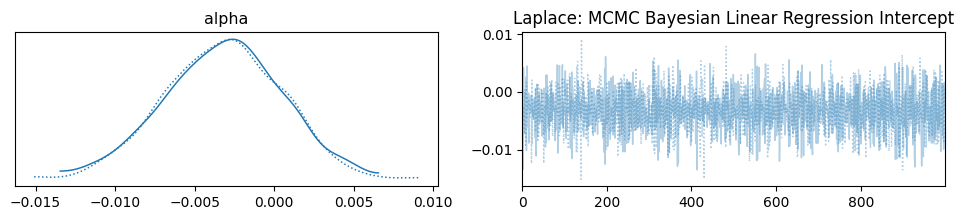

<Figure size 600x400 with 0 Axes>

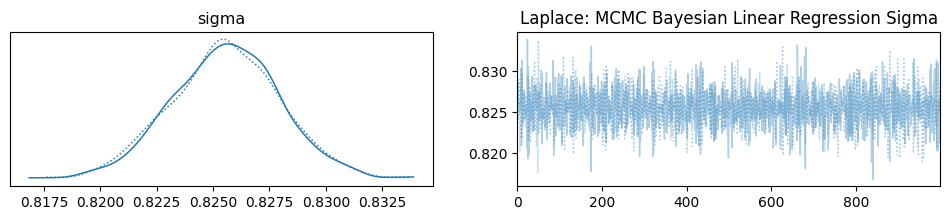

In [ ]:
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

with model:
    # Convert the PyMC3 trace to ArviZ InferenceData
    trace_infdata = pm.to_inference_data(trace)

# Plot for 'betas' (coefficients/slope)
plt.figure(figsize=(6, 4))
az.plot_trace(trace_infdata, var_names=["betas"])
plt.title("Laplace: MCMC Bayesian Linear Regression Slope")
plt.show()

# Plot for 'alpha' (intercept)
plt.figure(figsize=(6, 4))
az.plot_trace(trace_infdata, var_names=["alpha"])
plt.title("Laplace: MCMC Bayesian Linear Regression Intercept")
plt.show()

# Plot for 'sigma' (noise/uncertainty)
plt.figure(figsize=(6, 4))
az.plot_trace(trace_infdata, var_names=["sigma"])
plt.title("Laplace: MCMC Bayesian Linear Regression Sigma")
plt.show()


In [ ]:
import arviz as az
import pymc as pm

with model:
    # Convert PyMC3 trace to ArviZ InferenceData
    trace_infdata = pm.to_inference_data(trace)

# Generate and display summary statistics
summary = az.summary(trace_infdata)
summary

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha     -0.003  0.004  -0.010    0.003        0.0      0.0    5379.0   
betas[0]  -0.091  0.004  -0.099   -0.084        0.0      0.0    2819.0   
betas[1]   0.284  0.004   0.276    0.292        0.0      0.0    2767.0   
betas[2]   0.009  0.004   0.002    0.016        0.0      0.0    4587.0   
betas[3]   0.056  0.004   0.049    0.063        0.0      0.0    3431.0   
betas[4]  -0.089  0.004  -0.097   -0.081        0.0      0.0    2557.0   
betas[5]  -0.050  0.005  -0.060   -0.040        0.0      0.0    2667.0   
betas[6]   0.010  0.005   0.000    0.019        0.0      0.0    3143.0   
betas[7]   0.424  0.004   0.416    0.431        0.0      0.0    3545.0   
betas[8]   0.044  0.004   0.036    0.051        0.0      0.0    3706.0   
betas[9]   0.040  0.004   0.033    0.048        0.0      0.0    3568.0   
betas[10] -0.027  0.005  -0.035   -0.018        0.0      0.0    2732.0   
betas[11] -0.006  0.004  -0.013    0.001        0.0      0.0    4086.0   
betas[12]  0.043  0.005   0.034    0.051        0.0      0.0    3387.0   
betas[13] -0.007  0.004  -0.014    0.000        0.0      0.0    3453.0   
betas[14]  0.047  0.004   0.039    0.055        0.0      0.0    4325.0   
sigma      0.826  0.002   0.821    0.830        0.0      0.0    5446.0   

           ess_tail  r_hat  
alpha        1449.0    1.0  
betas[0]     1757.0    1.0  
betas[1]     1779.0    1.0  
betas[2]     1641.0    1.0  
betas[3]     1608.0    1.0  
betas[4]     1584.0    1.0  
betas[5]     1740.0    1.0  
betas[6]     1739.0    1.0  
betas[7]     1668.0    1.0  
betas[8]     1632.0    1.0  
betas[9]     1695.0    1.0  
betas[10]    1607.0    1.0  
betas[11]    1563.0    1.0  
betas[12]    1719.0    1.0  
betas[13]    1787.0    1.0  
betas[14]    1347.0    1.0  
sigma        1535.0    1.0

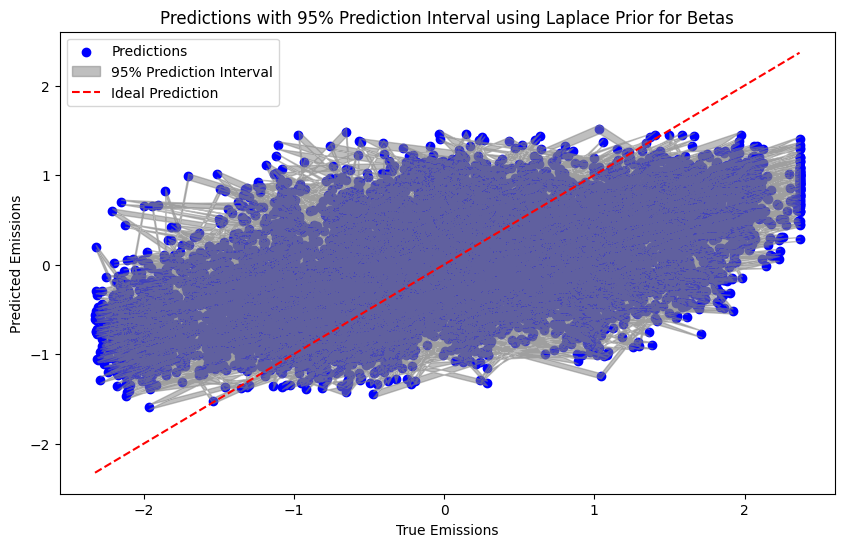

In [ ]:
# To extract the posterior samples for the betas
posterior_betas_samples = trace['betas']  # Shape (num_samples, num_predictors)
posterior_alpha_samples = trace['alpha']  # Shape (num_samples,)

# Example: Making predictions using the posterior samples
predictions_samples = []
for i in range(posterior_betas_samples.shape[0]):  # Loop over posterior samples
    alpha_sample = posterior_alpha_samples[i]
    betas_sample = posterior_betas_samples[i]

    # Calculate the predictions for the test set
    predictions_sample = alpha_sample + np.dot(X_test, betas_sample)
    predictions_samples.append(predictions_sample)

# Convert predictions list into a numpy array
predictions_samples = np.array(predictions_samples)

# Calculate 95% prediction interval
lower_bound = np.percentile(predictions_samples, 2.5, axis=0)
upper_bound = np.percentile(predictions_samples, 97.5, axis=0)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, np.mean(predictions_samples, axis=0), color='blue', label='Predictions')
plt.fill_between(y_test, lower_bound, upper_bound, color='gray', alpha=0.5, label='95% Prediction Interval')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('True Emissions')
plt.ylabel('Predicted Emissions')
plt.legend()
plt.title('Predictions with 95% Prediction Interval using Laplace Prior for Betas')
plt.show()

In [ ]:
mse_samples = []
for i in range(posterior_betas_samples.shape[0]):
    alpha_sample = posterior_alpha_samples[i]
    betas_sample = posterior_betas_samples[i]


    predictions_sample = alpha_sample + np.dot(X_test, betas_sample)

    mse = mean_squared_error(y_test, predictions_sample)

    mse_samples.append(mse)


mse_samples = np.array(mse_samples)

# Calculate the average MSE
average_mse = mse_samples.mean()

print(f"Average MSE (prior beta): {average_mse}")

Average MSE (prior beta): 0.6637953753126219


## Gamma Distribution Prior

In [ ]:
# Build Bayesian Linear Regression model with PyMC3
with pm.Model() as model:
    # Priors for coefficients using Gamma distribution
    alpha = pm.Gamma('alpha', alpha=2.0, beta=1.0)
    betas = pm.Gamma('betas', alpha=2.0, beta=1.0, shape=X_train.shape[1])
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Linear model
    mu = alpha + pm.math.dot(X_train, betas)

    # Likelihood
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y_train)

    # Posterior sampling using MCMC (NUTS sampler)
    trace = pm.sample(1000, return_inferencedata=False)

# Extract posterior samples
posterior_betas_samples = trace['betas']
posterior_alpha_samples = trace['alpha']

# Make predictions using posterior samples
predictions_samples = []
for i in range(posterior_betas_samples.shape[0]):
    alpha_sample = posterior_alpha_samples[i]
    betas_sample = posterior_betas_samples[i]

    # Calculate the predictions for the test set for this sample
    predictions_sample = alpha_sample + np.dot(X_test, betas_sample)

    # Append the predictions to the list
    predictions_samples.append(predictions_sample)

# Convert the predictions list into a numpy array
predictions_samples = np.array(predictions_samples)


Output()

Output()

### Parameters Posterior Distributions

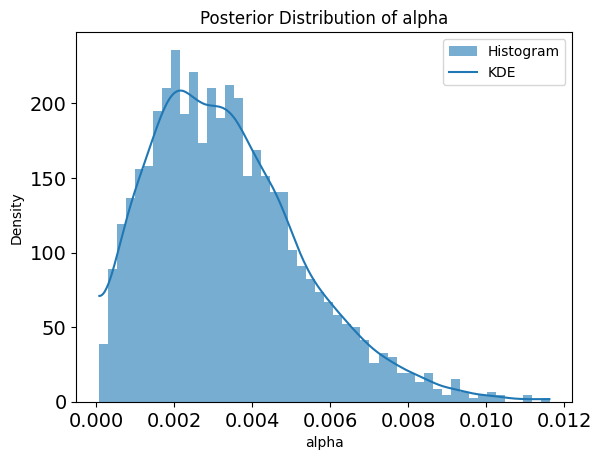

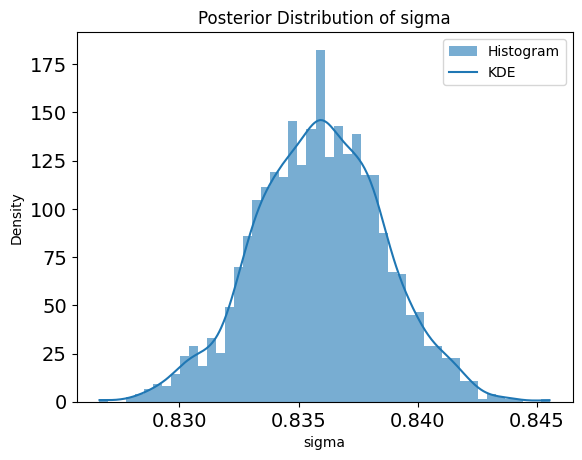

In [ ]:
# Kernel density estimate (KDE) for each parameter
for param in ["alpha", "sigma"]:
    plt.figure()
    plt.hist(trace[param], bins=50, density=True, alpha=0.6, label="Histogram")
    az.plot_kde(trace[param], label="KDE")
    plt.title(f"Posterior Distribution of {param}")
    plt.xlabel(param)
    plt.ylabel("Density")
    plt.legend()
    plt.show()


<Figure size 600x400 with 0 Axes>

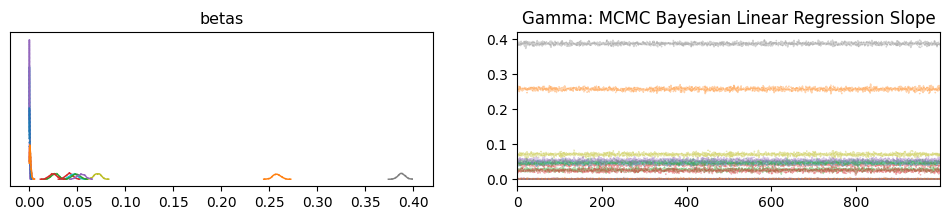

<Figure size 600x400 with 0 Axes>

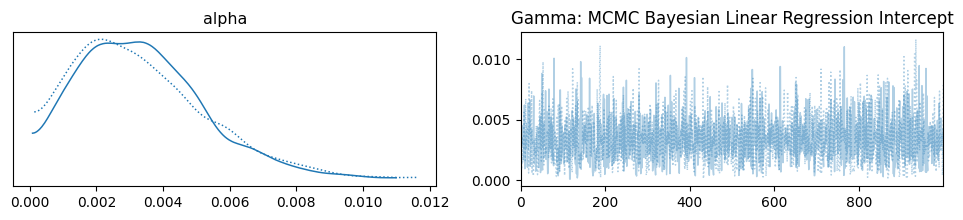

<Figure size 600x400 with 0 Axes>

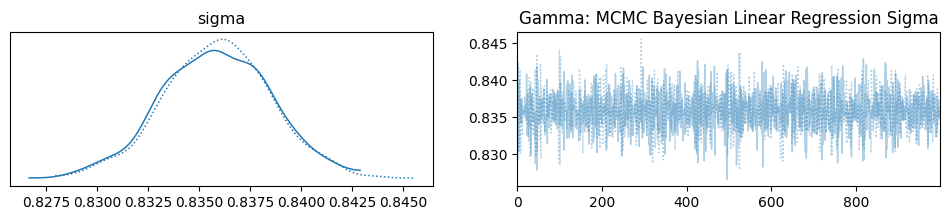

In [ ]:
with model:
    trace_infdata = pm.to_inference_data(trace)

plt.figure(figsize=(6, 4))
az.plot_trace(trace_infdata, var_names=["betas"])
plt.title("Gamma: MCMC Bayesian Linear Regression Slope")
plt.show()

plt.figure(figsize=(6, 4))
az.plot_trace(trace_infdata, var_names=["alpha"])
plt.title("Gamma: MCMC Bayesian Linear Regression Intercept")
plt.show()

plt.figure(figsize=(6, 4))
az.plot_trace(trace_infdata, var_names=["sigma"])
plt.title("Gamma: MCMC Bayesian Linear Regression Sigma")
plt.show()

### Parameters Statistical Summary

In [ ]:
summary = az.summary(trace_infdata, hdi_prob=0.95)
print(summary)


            mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha      0.003  0.002     0.000      0.007        0.0      0.0    2270.0   
betas[0]   0.000  0.000     0.000      0.001        0.0      0.0    3369.0   
betas[1]   0.258  0.004     0.250      0.267        0.0      0.0    2769.0   
betas[2]   0.027  0.004     0.020      0.034        0.0      0.0    3443.0   
betas[3]   0.042  0.004     0.035      0.049        0.0      0.0    3135.0   
betas[4]   0.000  0.000     0.000      0.001        0.0      0.0    2798.0   
betas[5]   0.001  0.001     0.000      0.003        0.0      0.0    2804.0   
betas[6]   0.001  0.001     0.000      0.002        0.0      0.0    3292.0   
betas[7]   0.388  0.004     0.380      0.395        0.0      0.0    3126.0   
betas[8]   0.071  0.004     0.063      0.078        0.0      0.0    3971.0   
betas[9]   0.046  0.004     0.039      0.054        0.0      0.0    3777.0   
betas[10]  0.001  0.000     0.000      0.001        0.0      0.0

### Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, mean_predictions)
mae = mean_absolute_error(y_test, mean_predictions)
rmse = np.sqrt(mean_squared_error(y_test, mean_predictions))

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 0.68
Mean Absolute Error (MAE): 0.66
Root Mean Squared Error (RMSE): 0.83


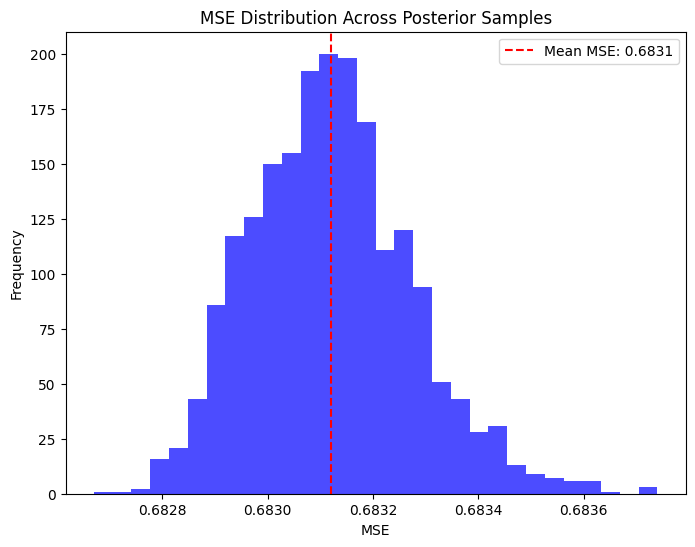

In [ ]:
mse_samples = [mean_squared_error(y_test, predictions_sample) for predictions_sample in predictions_samples]

plt.figure(figsize=(8, 6))
plt.hist(mse_samples, bins=30, alpha=0.7, color='blue')
plt.axvline(np.mean(mse_samples), color='red', linestyle='--', label=f"Mean MSE: {np.mean(mse_samples):.4f}")
plt.xlabel("MSE")
plt.ylabel("Frequency")
plt.title("MSE Distribution Across Posterior Samples")
plt.legend()
plt.show()


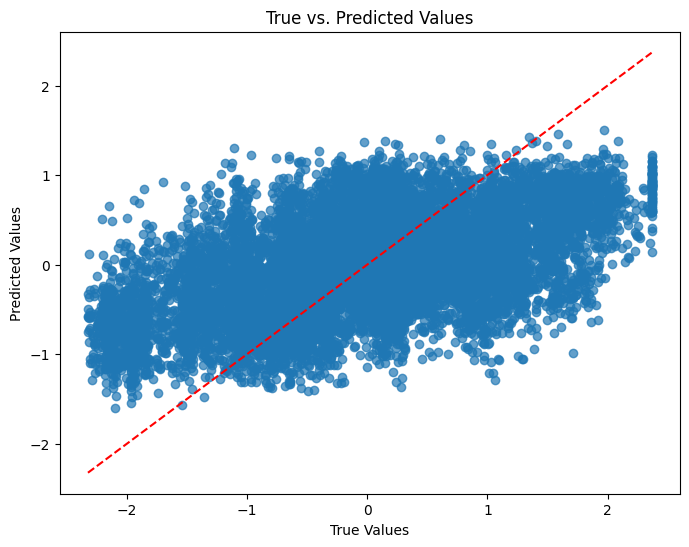

In [ ]:
mean_predictions = predictions_samples.mean(axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, mean_predictions, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.show()


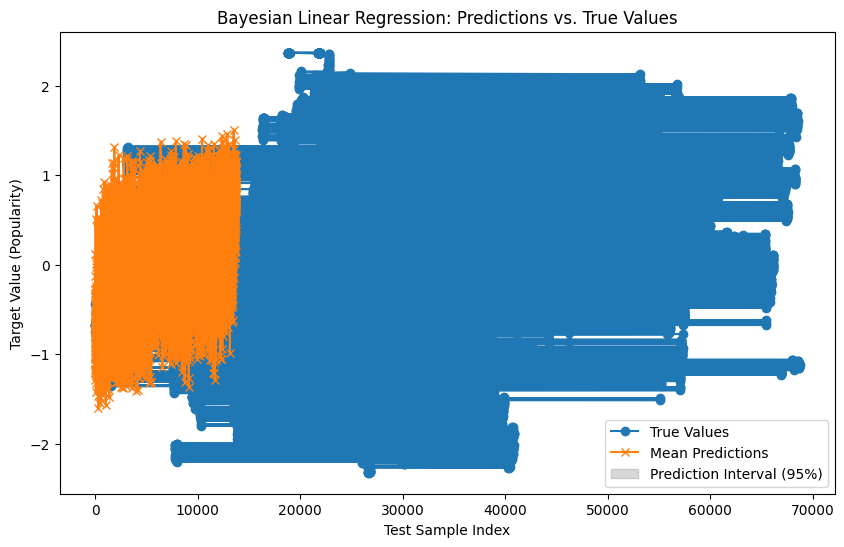

In [ ]:
lower_bound = np.percentile(predictions_samples, 2.5, axis=0)
upper_bound = np.percentile(predictions_samples, 97.5, axis=0)
mean_predictions = predictions_samples.mean(axis=0)

sorted_idx = np.argsort(y_test)
sorted_y_test = y_test.iloc[sorted_idx]
sorted_mean_predictions = mean_predictions[sorted_idx]
sorted_lower_bound = lower_bound[sorted_idx]
sorted_upper_bound = upper_bound[sorted_idx]

plt.figure(figsize=(10, 6))
plt.plot(sorted_y_test, label="True Values", marker="o")
plt.plot(sorted_mean_predictions, label="Mean Predictions", marker="x")
plt.fill_between(
    range(len(sorted_y_test)),
    sorted_lower_bound,
    sorted_upper_bound,
    color="gray",
    alpha=0.3,
    label="Prediction Interval (95%)",
)
plt.xlabel("Test Sample Index")
plt.ylabel("Target Value (Popularity)")
plt.title("Bayesian Linear Regression: Predictions vs. True Values")
plt.legend()
plt.show()


### Classical Linear Regression

**Simple Linear**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

y_test_pred = linear_reg_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
# r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f"Test MSE: {mse_test}")

Test MSE: 0.699531835


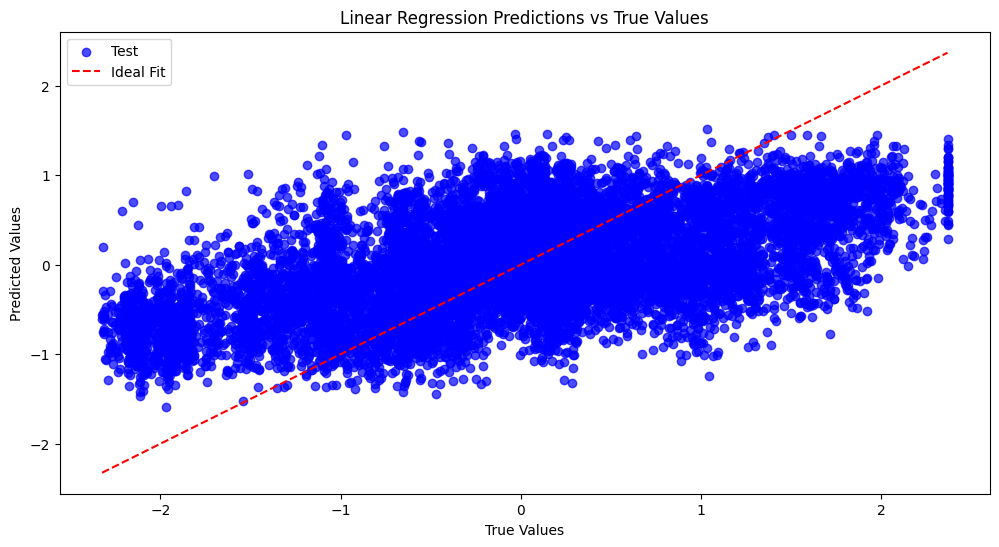

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, label='Test', color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Linear Regression Predictions vs True Values")
plt.show()

**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

degree = 2
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

y_test_pred_poly = poly_reg_model.predict(X_test_poly)

mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
# r2_test_poly = r2_score(y_test, y_test_pred_poly)





In [ ]:
print(f"Test MSE for Polynomial Regression: {mse_test_poly}")
# print(f"Test R2 for Polynomial Regression: {r2_test_poly}")

Test MSE for Polynomial Regression: 0.5349970487974922


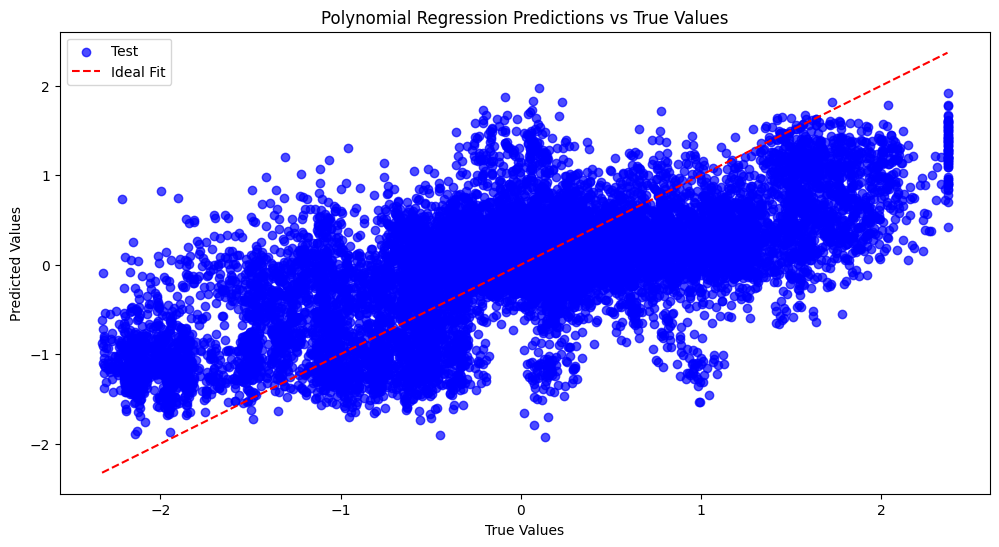

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred_poly, label='Test', color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Polynomial Regression Predictions vs True Values")
plt.show()

**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

ridge_reg_model = Ridge(alpha=1.0)
ridge_reg_model.fit(X_train, y_train)

y_test_pred_ridge = ridge_reg_model.predict(X_test)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

In [ ]:
print(f"Test MSE for Ridge Regression: {mse_test_ridge}")

Test MSE for Ridge Regression: 0.689925


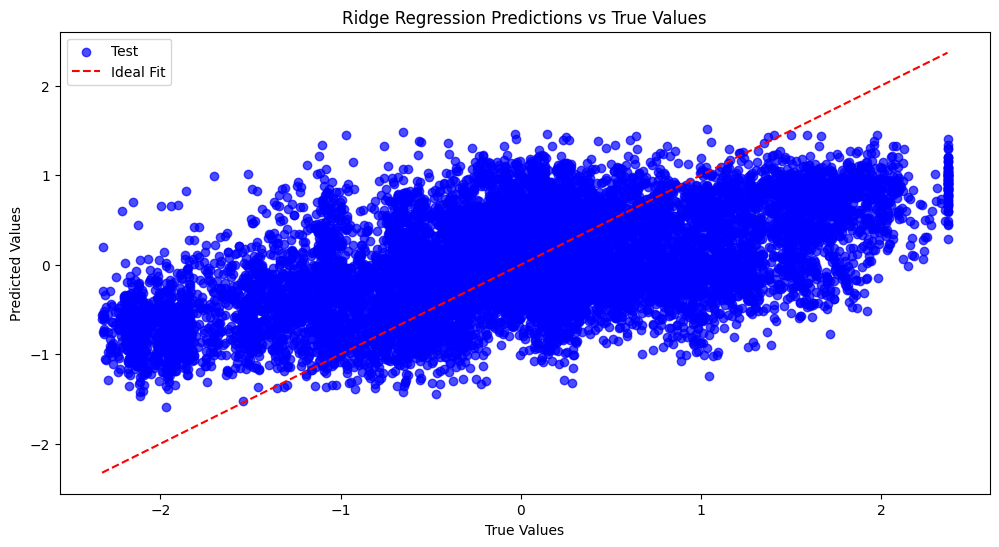

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred_ridge, label='Test', color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Ridge Regression Predictions vs True Values")
plt.show()

### Lasso Regression Model

In [12]:
lambda_value = 0.1
lasso_model = Lasso(alpha=lambda_value)
lasso_model.fit(X_train, y_train)

# Predictions
y_pred = lasso_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Display coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))


Mean Squared Error (MSE): 0.71
Mean Absolute Error (MAE): 0.67
Root Mean Squared Error (RMSE): 0.84
                                      Feature  Coefficient
7   NitrogenDioxide_NO2_column_number_density     0.299922
1                                   longitude     0.189276
0                                    latitude    -0.000000
3               SulphurDioxide_cloud_fraction     0.000000
4     CarbonMonoxide_CO_column_number_density    -0.000000
5    CarbonMonoxide_H2O_column_number_density     0.000000
2    SulphurDioxide_SO2_column_number_density     0.000000
6                 CarbonMonoxide_cloud_height    -0.000000
8         NitrogenDioxide_tropopause_pressure     0.000000
9     NitrogenDioxide_absorbing_aerosol_index     0.000000
10             Ozone_O3_column_number_density    -0.000000
11             Ozone_O3_effective_temperature    -0.000000
12                       Ozone_cloud_fraction     0.000000
13                   Cloud_cloud_top_pressure     0.000000
14             

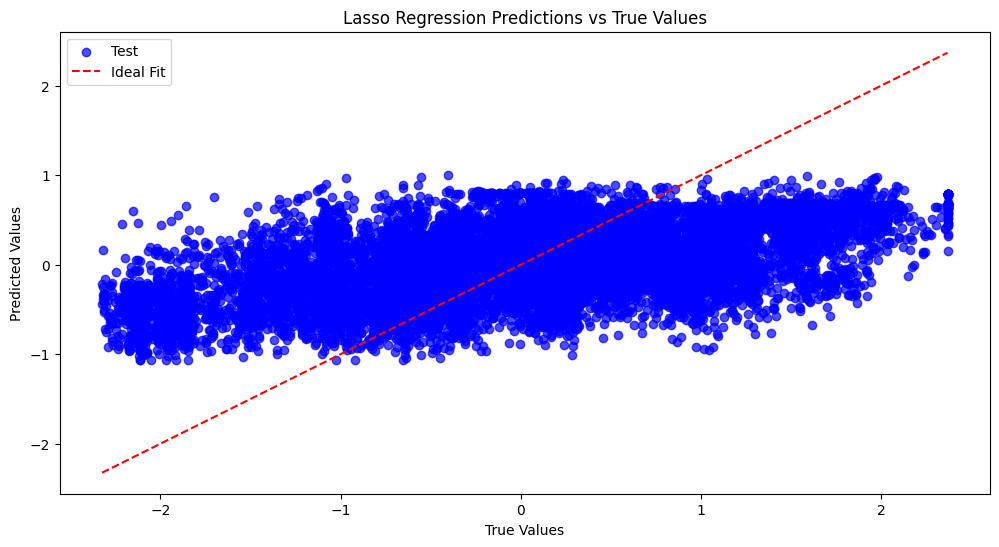

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, label='Test', color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Lasso Regression Predictions vs True Values")
plt.show()